In [ ]:
df

,Name,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
0,Andol .5mg Tablet,Haloperidol .5mg,Andol .5mg Tablet can also be used for treatin...,n n ul n n Schizophrenia n n n,Schizophrenia Schizophrenia is a mental disord...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Andol .5mg Tablet is a typical antipsychotic. ...,Andol .5mg Tablet helps treat schizophrenia. I...,"Alcohol , Andol .5mg Tablet may cause excessiv...",Butyrophenone Derivative,No,NEURO CNS,Typical Antipsychotic
1,Avastin 100mg Injection,Bevacizumab 100mg,p style line height . margin margin style font...,n n ul n n Cancer of colon and rectum n n n No...,Cancer of colon and rectum Cancer of the colon...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Avastin 100mg Injection is a anti angiogenic m...,"Avastin 100mg Injection is an effective, first...","Alcohol , It is not known whether it is safe t...",Monoclonal antibody mAb,No,ANTI NEOPLASTICS,Vascular endothelial growth factor VEGF inhibitor
2,Actorise Injection,Darbepoetin alfa 40mcg,Actorise Injection is a medicine that needs to...,n n ul n n Treatment of Anemia due to chronic ...,Treatment of Anemia due to chronic kidney dise...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise Injection is an erythropoiesis stimul...,Actorise Injection helps in the treatment of a...,"Alcohol , It is not known whether it is safe t...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis stimulating agent ESA
3,Actorise Injection,Darbepoetin alfa 25mcg,Actorise Injection is a medicine that needs to...,n n ul n n Treatment of Anemia due to chronic ...,Treatment of Anemia due to chronic kidney dise...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise Injection is an erythropoiesis stimul...,Actorise Injection helps in the treatment of a...,"Alcohol , It is not known whether it is safe t...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis stimulating agent ESA
4,Actorise Injection,Darbepoetin alfa 60mcg,Actorise Injection is a medicine that needs to...,n n ul n n Treatment of Anemia due to chronic ...,Treatment of Anemia due to chronic kidney dise...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise Injection is an erythropoiesis stimul...,Actorise Injection helps in the treatment of a...,"Alcohol , It is not known whether it is safe t...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis stimulating agent ESA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192802,Zedoxy 200 Tablet,Cefpodoxime Proxetil 200mg,Zedoxy 200 Tablet should be taken with food. Y...,n n ul n n Treatment of Bacterial infections n...,Treatment of Bacterial infections Zedoxy 200 T...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Zedoxy 200 Tablet is an antibiotic. It kills t...,Your doctor has prescribed Zedoxy 200 Tablet t...,"Alcohol , Consuming alcohol with Zedoxy 200 Ta...",Broad Spectrum Third fourth generation cephalo...,No,ANTI INFECTIVES,Cephalosporins generatio
192803,Zonticin Eye Ear Drop,Gentamicin . w v,Zonticin Eye Ear Drop fights the infection by ...,n n ul n n Treatment of Bacterial eye infectio...,Treatment of Bacterial eye infections Zonticin...,Most side effects do not require any medical a...,This medicine is for external use only. Use it...,Zonticin Eye Ear Drop is an antibiotic. It sto...,You have been prescribed Zonticin Eye Ear Drop...,"Alcohol , No interaction found established,ima...",Aminoglycosides,No,OPHTHAL OTOLOGICALS,Aminoglycoside
192804,Zenoxa OD 900 Tablet SR,Oxcarbazepine 900mg,Zenoxa OD 900 Tablet SR may be used alon

Text Classification

In [ ]:
# We will use Name , ProductUses, QuickTips, and Chemical Class to predict the Therapuetic class of a drug

# Concatenate the text features into a single input feature
df['text'] = (
    df['Name'] + ' ' +
    df['ProductUses'] + ' ' +
    df['QuickTips'] + ' ' +
    df['Chemical_Class']
)


In [ ]:
#Encode Labels:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Therapeutic_Class'])


In [ ]:
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))


In [ ]:
class_mapping

{'ANTI DIABETI': 0,
 'ANTI DIABETIC': 1,
 'ANTI INFECTIVE': 2,
 'ANTI INFECTIVES': 3,
 'ANTI MALARIAL': 4,
 'ANTI MALARIALS': 5,
 'ANTI NEOPLASTIC': 6,
 'ANTI NEOPLASTICS': 7,
 'BLOOD RELATE': 8,
 'BLOOD RELATED': 9,
 'CARDIA': 10,
 'CARDIAC': 11,
 'DERM': 12,
 'DERMA': 13,
 'GASTRO INTESTINA': 14,
 'GASTRO INTESTINAL': 15,
 'GYNAECOLOGICA': 16,
 'GYNAECOLOGICAL': 17,
 'HORMONE': 18,
 'HORMONES': 19,
 'NEURO CN': 20,
 'NEURO CNS': 21,
 'OPHTHA': 22,
 'OPHTHAL': 23,
 'OPHTHAL OTOLOGICAL': 24,
 'OPHTHAL OTOLOGICALS': 25,
 'OTHER': 26,
 'OTHERS': 27,
 'OTOLOGICAL': 28,
 'OTOLOGICALS': 29,
 'PAIN ANALGESIC': 30,
 'PAIN ANALGESICS': 31,
 'RESPIRATOR': 32,
 'RESPIRATORY': 33,
 'SEX STIMULANTS REJUVENATOR': 34,
 'SEX STIMULANTS REJUVENATORS': 35,
 'STOMATOLOGICAL': 36,
 'STOMATOLOGICALS': 37,
 'UROLOG': 38,
 'UROLOGY': 39,
 'VACCINE': 40,
 'VACCINES': 41,
 'VITAMINS MINERALS NUTRIENT': 42,
 'VITAMINS MINERALS NUTRIENTS': 43}

In [ ]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Change text into numbers that computers can work with.
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
#Train a logistic regressoin model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Evaluate the Models Perfomance

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = clf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.9787874072921529
Classification Report:
                              precision    recall  f1-score   support

               ANTI DIABETI       1.00      0.99      1.00      1693
              ANTI DIABETIC       0.99      1.00      1.00       810
             ANTI INFECTIVE       0.98      0.98      0.98      2667
            ANTI INFECTIVES       0.98      0.99      0.98      4058
              ANTI MALARIAL       1.00      0.87      0.93        47
             ANTI MALARIALS       0.99      1.00      1.00       122
            ANTI NEOPLASTIC       0.95      0.88      0.92        68
           ANTI NEOPLASTICS       0.98      0.98      0.98       507
               BLOOD RELATE       0.96      0.96      0.96       197
              BLOOD RELATED       0.97      0.99      0.98       349
                     CARDIA       1.00      0.99      0.99      1697
                    CARDIAC       0.98      0.99      0.99      1438
                       DERM       0.96      0.92 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


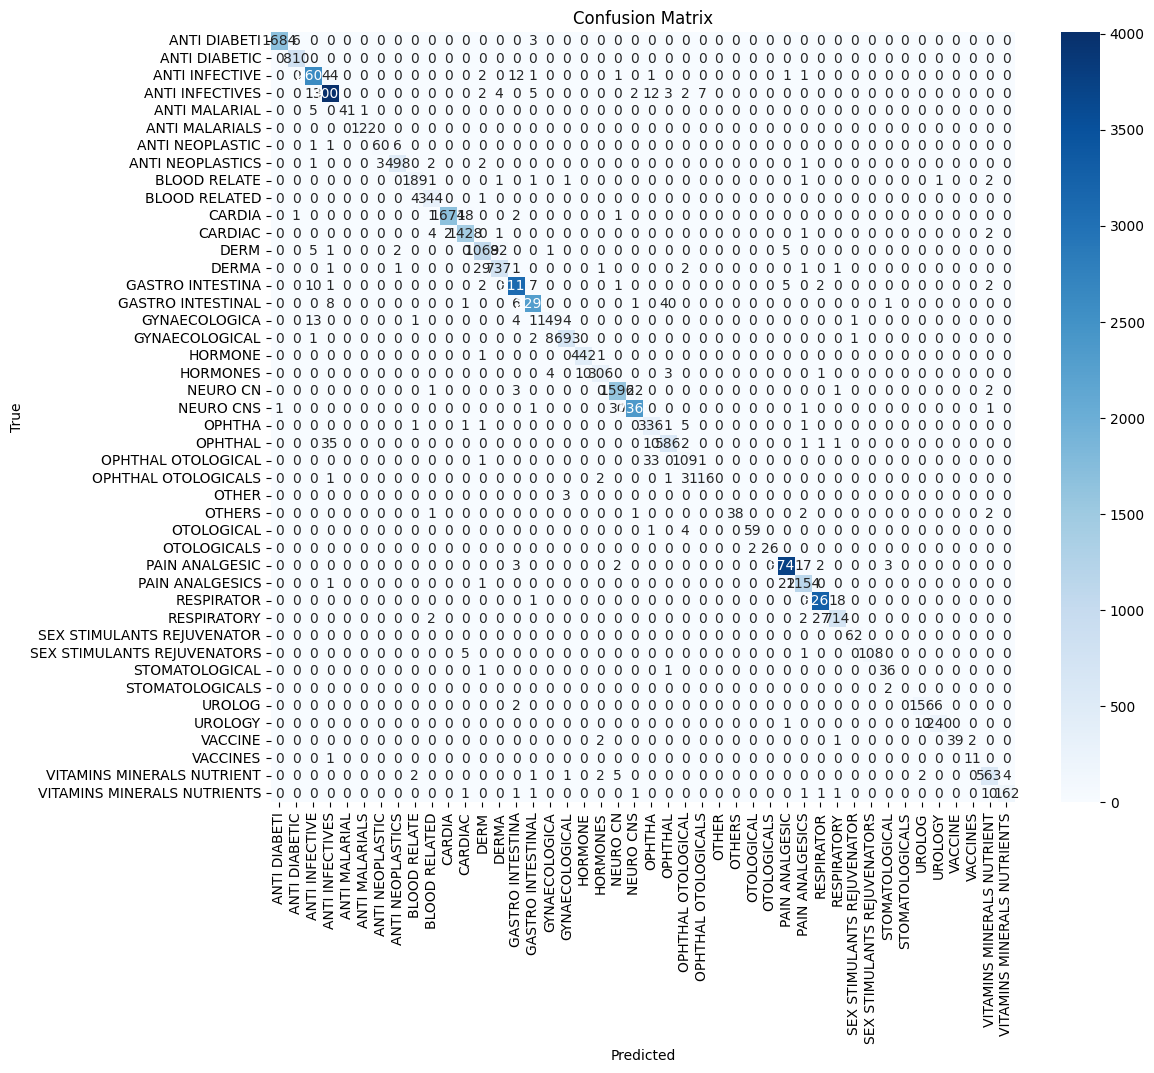

In [ ]:
#Visualize our confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Test Other ML Models(RandomForestClassifier, SVC, XGDBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)
rf_report = classification_report(y_test, rf_preds, output_dict=True)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Train and evaluate XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_preds = xgb_model.predict(X_test_tfidf)
xgb_report = classification_report(y_test, xgb_preds, output_dict=True)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# Train and evaluate SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)
svm_report = classification_report(y_test, svm_preds, output_dict=True)
svm_accuracy = accuracy_score(y_test, svm_preds)

# Create a summary DataFrame
results_summary = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [rf_accuracy, xgb_accuracy, svm_accuracy]
})

results_summary


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy
0,Random Forest,0.990846
1,XGBoost,0.991157
2,SVM,0.984389
